<a href="https://colab.research.google.com/github/smlra-kjsce/ML-101/blob/master/Naive%20Bayes%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Let's revise Bayes Theorem with a simple problem

1. Your doctor knows that cold causes fever 50% of the time.
2. Prior probability of any patient having cold is 1/50,000.
3. Prior probability of any patient having fever is 1/20.

Question: If you have fever, what’s the probability you have cold?
<details>
  <summary><b>Answer</b></summary>
$$
P(cold~|~{\rm fever}) = \frac{P({\rm fever}~|~cold)P(cold)}{P({\rm fever})} = \frac{{\rm 0.5*1/50000}}{{\rm 1/20}} = 0.0002
$$
</details>

## Monty Hall Problem

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1anvW4yoBcfB9YInP8xkaDvNLM4RSfWJ7/preview" width="640" height="480"></iframe>

Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice?

### Solution

In [ ]:
%%html
<iframe src="https://drive.google.com/file/d/1uvLahqwVzgYtYhwqqCcgpn3NgB0DD06U/preview" width="640" height="480"></iframe>

Let hypothesis H: Door 1 has car behind

Let evidence E: Monty always reveals a door behind which is a goat

$$
P(H~|~{\rm E}) = \frac{P({\rm E}~|~H)*P(H)}{P({\rm E})}
$$

$$
P(H~|~{\rm E}) = \frac{P({\rm E}~|~H)*P(H)}{P({\rm E~|~H})*P(H) + P(E| notH)*P(notH)}
$$

$$
P(E|H) = 1, P(E|notH) = 1, P(H) = 1/3
$$

$$
P(H~|~{\rm E}) = \frac{1* 1/3}{1 * 1/3 + 1 * 2/3)} = 1
$$

$$
P(car~when~you~switch~door) = 1 - P(H|E) = 2/3
$$



## Naive Bayes

Naive Bayes classifiers are built on Bayesian classification methods.
These rely on Bayes's theorem, which is an equation describing the relationship of conditional probabilities of statistical quantities.
In Bayesian classification, we're interested in finding the probability of a class given some observed features, which we can write as $P(class~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(class~|~{\rm features}) = \frac{P({\rm features}~|~class)P(class)}{P({\rm features})}
$$
$$
{P({\rm features}~|~class)}: Likelihood,~{P(class)}: Prior,~{P({\rm features})}: Normalization~Constant
$$

If we are trying to decide between two classes-let's call them $class_1$ and $class_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each class:

$$
\frac{P(class_1~|~{\rm features})}{P(class_2~|~{\rm features})} = \frac{P({\rm features}~|~class_1)}{P({\rm features}~|~class_2)}\frac{P(class_1)}{P(class_2)}
$$

All we need now is some model by which we can compute $P({\rm features}~|~class_i)$ for each class. 
Such a model is called a *generative model* because it specifies the hypothetical random process that generates the data.
A generative model learns the joint probability distribution p(x,y) (which is p(x | y) * p(y) here) and a discriminative model learns the conditional probability distribution p(y|x) - which you should read as "the probability of y given x". Read [here](http://ai.stanford.edu/~ang/papers/nips01-discriminativegenerative.pdf) more about generative and discriminative models.

Specifying this generative model for each class is the main piece of the training of such a Bayesian classifier.
The general version of such a training step is a very difficult task, but we can make it simpler through the use of some simplifying assumptions about the form of this model.

This is where the "naive" in "Naive Bayes" comes in: if we make very naive assumptions about the generative model for each class, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification. It makes the assumption that features of a measurement are independent of each other. This is naive because it is (almost) never true.
Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

We begin with the standard imports:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

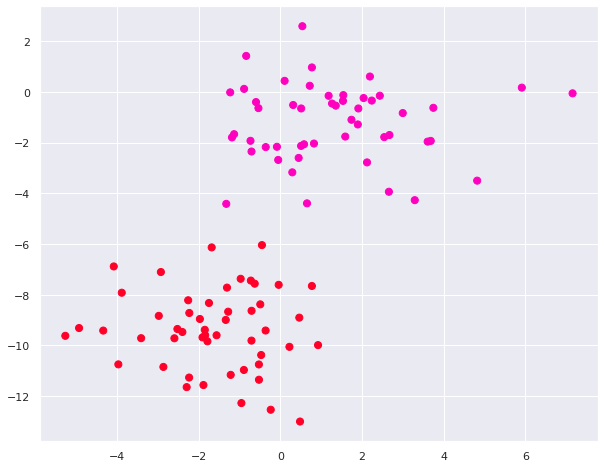

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='gist_rainbow');

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Now let's generate some random data and see how they are being classified...

In [ ]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(25000, 2)
ynew = model.predict(Xnew)

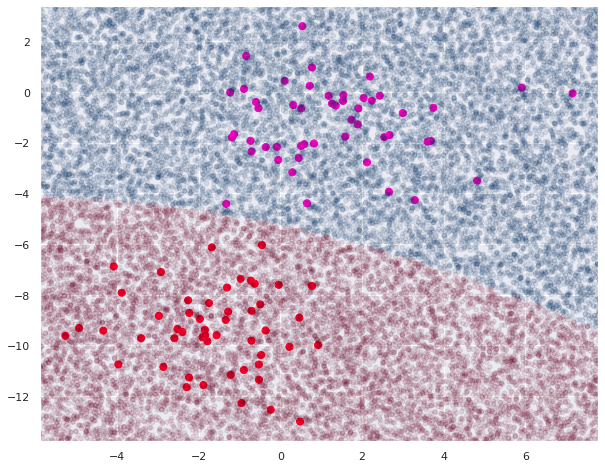

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='gist_rainbow')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[-10:].round(2)

array([[1.  , 0.  ],
       [0.42, 0.58],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.57, 0.43],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ]])

The columns give the posterior probabilities of the first and second class, respectively.
If you are looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a useful approach.

Of course, the final classification will only be as good as the model assumptions that lead to it, which is why Gaussian naive Bayes often does not produce very good results.
Still, in many cases—especially as the number of features becomes large—this assumption is not detrimental enough to prevent Gaussian naive Bayes from being a useful method.

## Multinomial Naive Bayes

The Gaussian assumption just described is by no means the only simple assumption that could be used to specify the generative distribution for each label.
Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution.
The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

The idea is precisely the same as before, except that instead of modeling the data distribution with the best-fit Gaussian, we model the data distribuiton with a best-fit multinomial distribution.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified.
Here we will use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.

Let's download the data and take a look at the target names:

In [ ]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

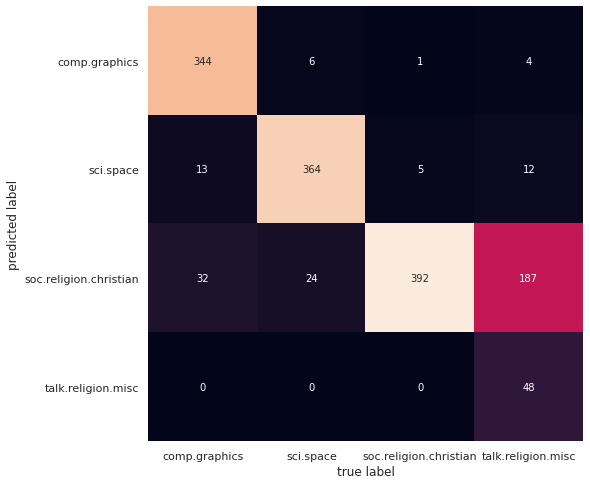

In [ ]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,8))
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Evidently, even this very simple classifier can successfully separate space talk from computer talk, but it gets confused between talk about religion and talk about Christianity.
This is perhaps an expected area of confusion!

The very cool thing here is that we now have the tools to determine the category for *any* string, using the ``predict()`` method of this pipeline.
Here's a quick utility function that will return the prediction for a single string:

In [ ]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [ ]:
predict_category('sending a payload to the ISS')

'sci.space'

In [ ]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [ ]:
predict_category('determining networking issues')

'comp.graphics'

## When to Use Naive Bayes

Because naive Bayesian classifiers make such stringent assumptions about data, they will generally not perform as well as a more complicated model.
That said, they have several advantages:

- They are extremely fast for both training and prediction
- They provide straightforward probabilistic prediction
- They are often very easily interpretable
- They have very few (if any) tunable parameters

These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.